In [1]:
# Importing necessary libraries
import pandas as pd # For Manipulation of data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler # Scaling and encoding
from sklearn.model_selection import train_test_split # Training and Test + Validation
from sklearn.tree import DecisionTreeClassifier # Model 1 -> DecisionTree Classification
from sklearn.ensemble import RandomForestClassifier # Model 2 -> RandomForest Classification
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve 
from sklearn.metrics import ConfusionMatrixDisplay # Display of Confusion Matrix
from imblearn.over_sampling import SMOTE # Resampling using Synthetic Minority Oversampling
from imblearn.under_sampling import RandomUnderSampler # Resampling using Random Under sampling
import matplotlib.pyplot as plt # Plotting 

In [2]:
data = pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [3]:
print(data.head()) # -> General overview of content in the dataset

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [4]:
print(data.info()) # -> Data types for each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [5]:
print(data.describe()) # -> Mean, std, minmax, and percentile distribution

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

In [6]:
fraud_counts = data['isFraud'].value_counts()
print(fraud_counts) # -> How much is actually fraudulent, how much is not fraudulent?

isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [7]:
fraud_counts = data['isFlaggedFraud'].value_counts()
print(fraud_counts) # -> How much is flagged as fraudulent, how much is not?

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


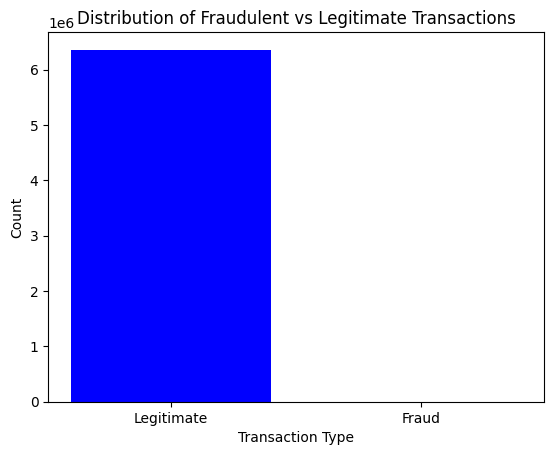

In [8]:
plt.bar(fraud_counts.index, fraud_counts.values, color=['blue', 'orange'])
plt.title("Distribution of Fraudulent vs Legitimate Transactions")
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

In [9]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [10]:
encoder = LabelEncoder()
data['type'] = encoder.fit_transform(data['type']) # -> Encode type into model-readable values

In [11]:
X = data.drop(columns=['isFraud', 'isFlaggedFraud','oldbalanceDest', 'newbalanceDest', 'nameOrig', 'nameDest']) 
y = data['isFraud'] # -> Drop all columns, leave the ones we need.

In [12]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [63]:
dt = DecisionTreeClassifier(
    class_weight='balanced',  
    max_depth=15,             
    min_samples_leaf=10,      
    min_samples_split=10,     
    random_state=42           
)

In [64]:
dt.fit(X_train, y_train) # -> fit into the decision tree classifier.

DecisionTreeClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=10, min_samples_split=10,
                       random_state=42)

In [65]:
y_pred_val = dt.predict(X_val)
y_pred_prob_val = dt.predict_proba(X_val)[:, 1] # -> Assign and predict

In [66]:
print("Classification Report (Decision Tree):")
print(classification_report(y_val, y_pred_val))

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270928
           1       0.49      0.93      0.64      1596

    accuracy                           1.00   1272524
   macro avg       0.74      0.97      0.82   1272524
weighted avg       1.00      1.00      1.00   1272524



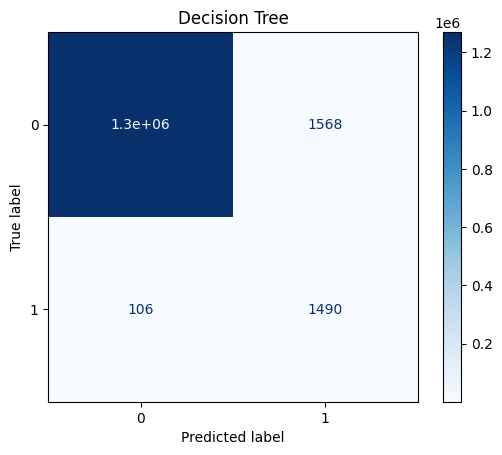

In [67]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val, cmap='Blues')
plt.title("Decision Tree")
plt.show()

In [68]:
roc_auc_dt = roc_auc_score(y_val, y_pred_prob_val)
print(f"ROC AUC Score (Decision Tree): {roc_auc_dt:.4f}")

ROC AUC Score (Decision Tree): 0.9666


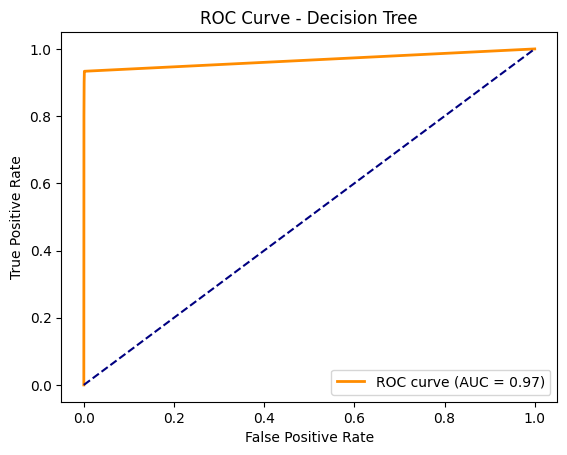

In [69]:
fpr_dt, tpr_dt, _ = roc_curve(y_val, y_pred_prob_val)
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc_dt:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("ROC Curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

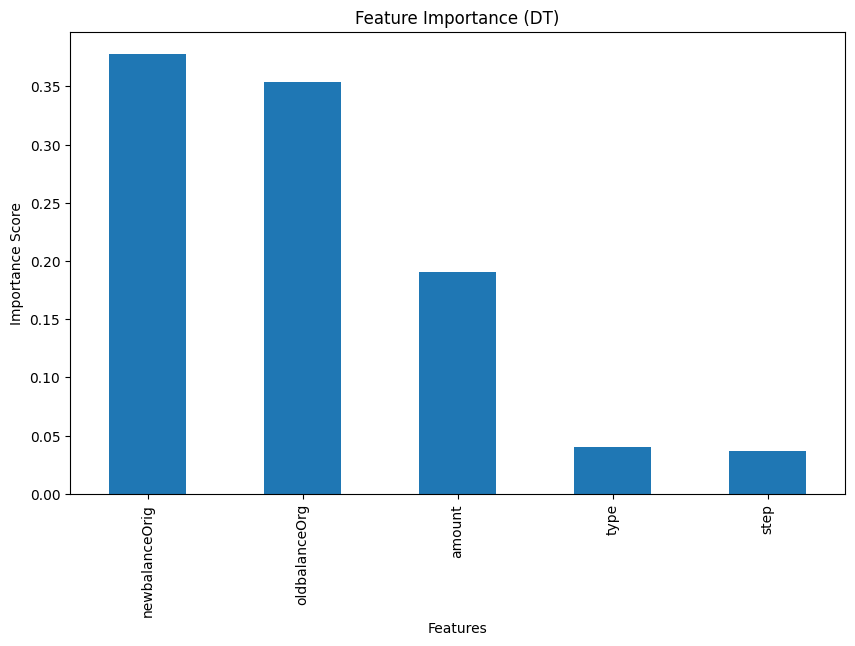

In [70]:
feature_importances = pd.Series(dt.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importance (DT)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [71]:
rf = RandomForestClassifier(
    n_estimators=100,          
    class_weight='balanced',   
    max_depth=15,              
    random_state=42,           
    n_jobs=-1                  
)

In [72]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_jobs=-1,
                       random_state=42)

In [73]:
y_pred_val = rf.predict(X_val)
y_pred_prob_val = rf.predict_proba(X_val)[:, 1]  

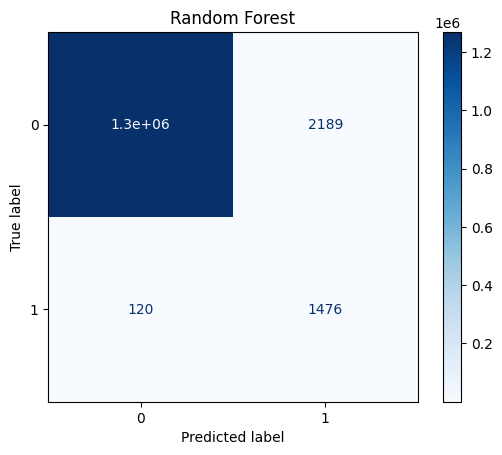

In [74]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val, cmap='Blues')
plt.title("Random Forest")
plt.show()

In [75]:
print("Classification Report (Random Forest):")
print(classification_report(y_val, y_pred_val))

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270928
           1       0.40      0.92      0.56      1596

    accuracy                           1.00   1272524
   macro avg       0.70      0.96      0.78   1272524
weighted avg       1.00      1.00      1.00   1272524



In [76]:
roc_auc_rf = roc_auc_score(y_val, y_pred_prob_val)
print(f"ROC AUC Score (Random Forest): {roc_auc_rf:.4f}")

ROC AUC Score (Random Forest): 0.9982


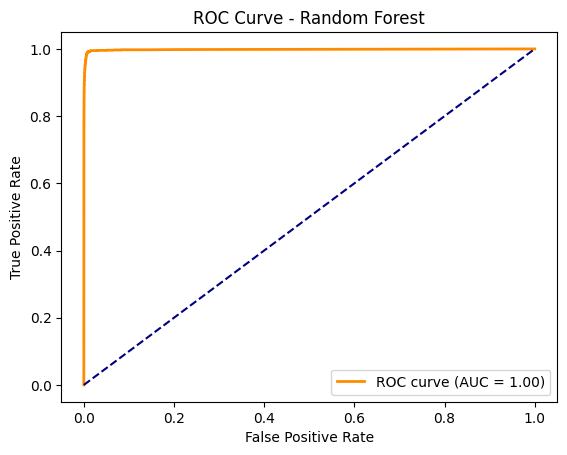

In [77]:
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_pred_prob_val)
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

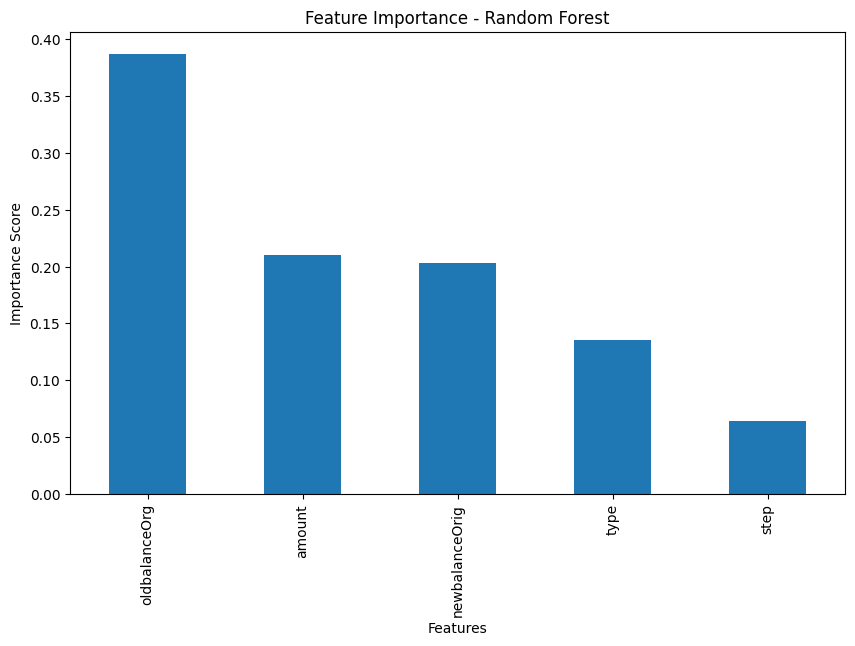

In [78]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [79]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [80]:
dt.fit(X_train_smote, y_train_smote)
y_pred_val = dt.predict(X_val)
y_pred_prob_val = dt.predict_proba(X_val)[:, 1]

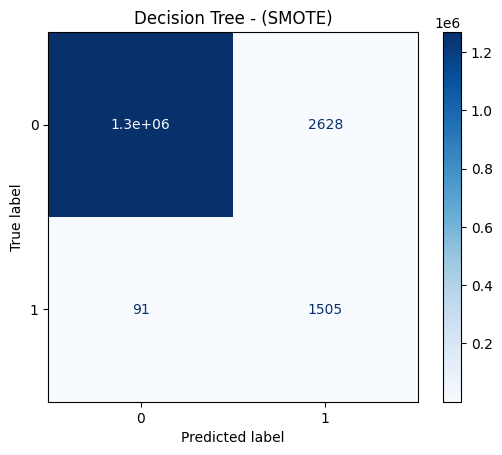

In [81]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val, cmap='Blues')
plt.title("Decision Tree - (SMOTE)")
plt.show()

In [82]:
print("\nClassification Report (Decision Tree - SMOTE):")
print(classification_report(y_val, y_pred_val))
print(f"\nROC AUC Score (Decision Tree - SMOTE): {roc_auc_score(y_val, y_pred_prob_val):.4f}")


Classification Report (Decision Tree - SMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270928
           1       0.36      0.94      0.53      1596

    accuracy                           1.00   1272524
   macro avg       0.68      0.97      0.76   1272524
weighted avg       1.00      1.00      1.00   1272524


ROC AUC Score (Decision Tree - SMOTE): 0.9734


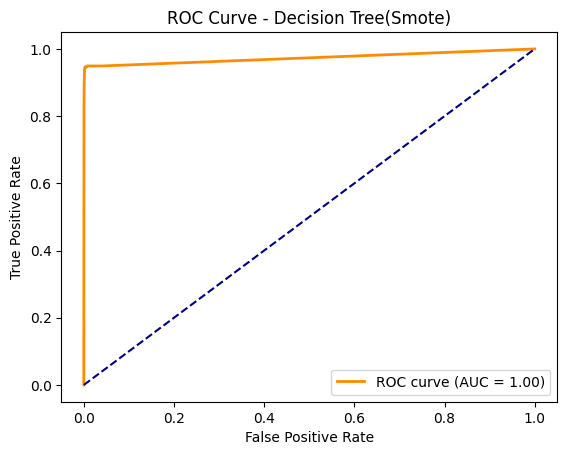

In [83]:
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_pred_prob_val)
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("ROC Curve - Decision Tree(Smote)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [84]:
rf.fit(X_train_smote, y_train_smote)
y_pred_val = rf.predict(X_val)
y_pred_prob_val = rf.predict_proba(X_val)[:, 1]

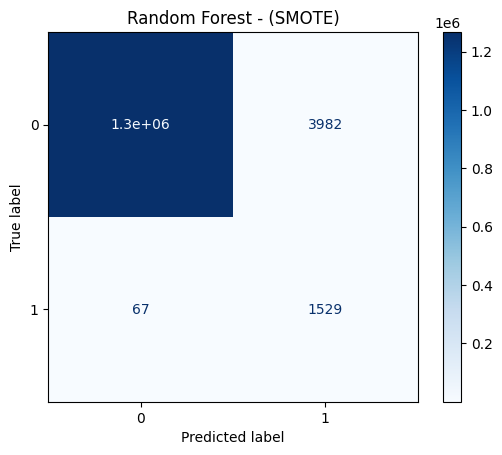

In [85]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val, cmap='Blues')
plt.title("Random Forest - (SMOTE)")
plt.show()

In [86]:
print("\nClassification Report (Random Forest - SMOTE):")
print(classification_report(y_val, y_pred_val))
print(f"\nROC AUC Score (Random Forest - SMOTE): {roc_auc_score(y_val, y_pred_prob_val):.4f}")


Classification Report (Random Forest - SMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270928
           1       0.28      0.96      0.43      1596

    accuracy                           1.00   1272524
   macro avg       0.64      0.98      0.71   1272524
weighted avg       1.00      1.00      1.00   1272524


ROC AUC Score (Random Forest - SMOTE): 0.9983


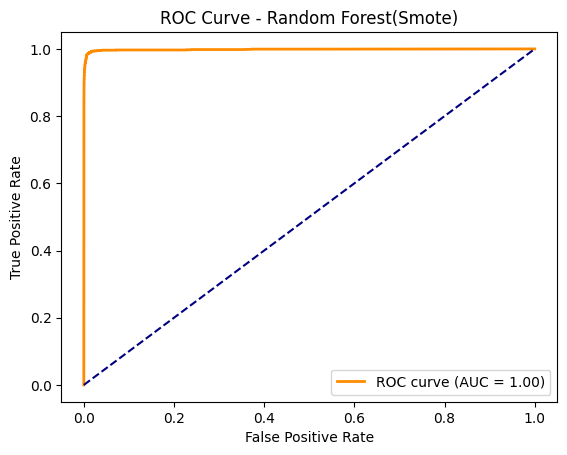

In [87]:
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_pred_prob_val)
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("ROC Curve - Random Forest(Smote)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [88]:
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [89]:
dt.fit(X_train_under, y_train_under)
y_pred_val = dt.predict(X_val)
y_pred_prob_val = dt.predict_proba(X_val)[:, 1]

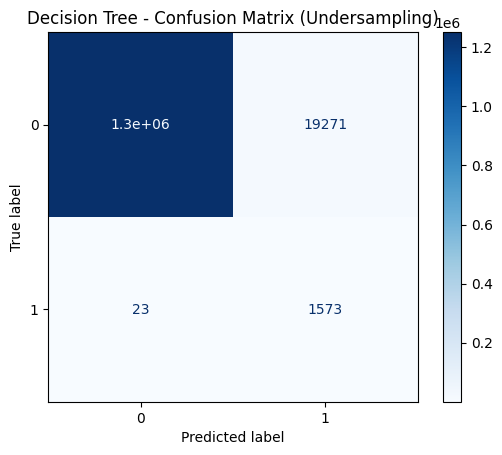

In [90]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val, cmap='Blues')
plt.title("Decision Tree - Confusion Matrix (Undersampling)")
plt.show()

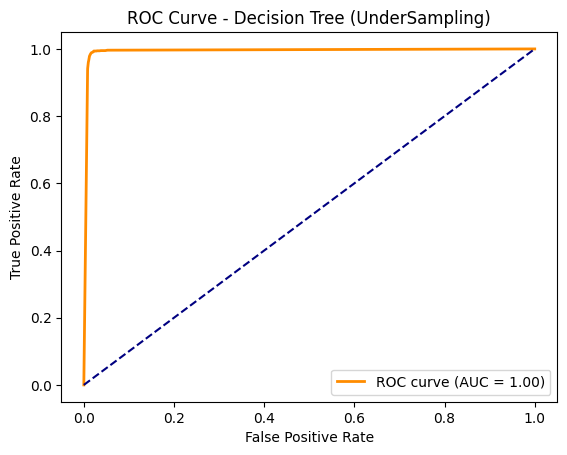

In [91]:
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_pred_prob_val)
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("ROC Curve - Decision Tree (UnderSampling)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [92]:
print("\nClassification Report (Decision Tree - Undersampling):")
print(classification_report(y_val, y_pred_val))
print(f"\nROC AUC Score (Decision Tree - Undersampling): {roc_auc_score(y_val, y_pred_prob_val):.4f}")


Classification Report (Decision Tree - Undersampling):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270928
           1       0.08      0.99      0.14      1596

    accuracy                           0.98   1272524
   macro avg       0.54      0.99      0.57   1272524
weighted avg       1.00      0.98      0.99   1272524


ROC AUC Score (Decision Tree - Undersampling): 0.9933


In [93]:
rf.fit(X_train_under, y_train_under)
y_pred_val = rf.predict(X_val)
y_pred_prob_val = rf.predict_proba(X_val)[:, 1]

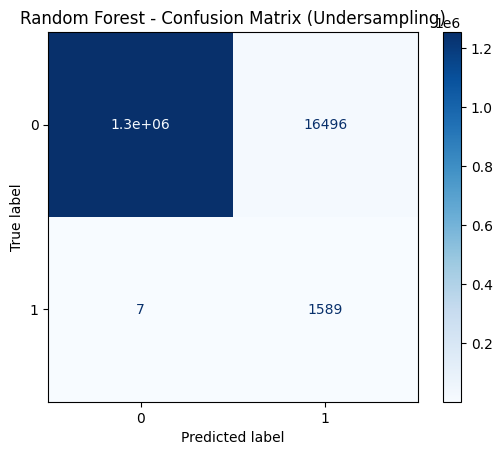

In [94]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val, cmap='Blues')
plt.title("Random Forest - Confusion Matrix (Undersampling)")
plt.show()

In [95]:
print("\nClassification Report (Random Forest - Undersampling):")
print(classification_report(y_val, y_pred_val))
print(f"\nROC AUC Score (Random Forest - Undersampling): {roc_auc_score(y_val, y_pred_prob_val):.4f}")


Classification Report (Random Forest - Undersampling):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270928
           1       0.09      1.00      0.16      1596

    accuracy                           0.99   1272524
   macro avg       0.54      0.99      0.58   1272524
weighted avg       1.00      0.99      0.99   1272524


ROC AUC Score (Random Forest - Undersampling): 0.9984


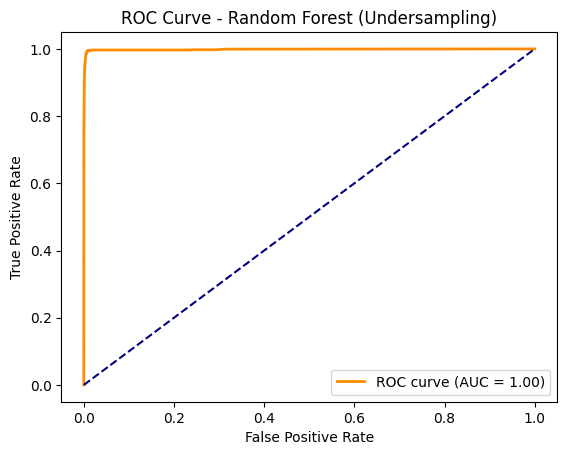

In [96]:
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_pred_prob_val)
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("ROC Curve - Random Forest (Undersampling)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()